# LangChain and Google's Gemini

In [1]:
from tabnanny import verbose

pip install -q langchain_google_genai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [3]:
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [4]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

C:\Users\james\AppData\Local\Temp\ipykernel_10428\1397781936.py:1: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/gemini-2.5-computer-use-preview-10-2025
models/deep-research-pro-preview-12-2025
models/gemini-embedding-001
models/aqa
models/imagen-4.0-generate-preview-06-06
models/imagen-4.0-ultra-generate-preview-06-06
models/imag

## Integrating Gemini with LangChain

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash', temperature=0.9)
response = llm.invoke('Write a paragraph about life on Mars in year 2125.')
print(response.content)

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


By 2125, Martian life had settled into a robust rhythm within its extensive network of pressurized domes and subterranean habitats. Gone were the days of simple survival; now, researchers meticulously analyzed regolith samples for nascent microbial life, engineers oversaw automated mining operations extracting sub-surface ice, and botanists tended vast hydroponic farms glowing with the purple-pink light of synthetic suns. Every drop of recycled water and breath of filtered air was a testament to human ingenuity, powering the self-sufficient colonies where a unique, resilient culture had blossomed, deeply bonded by shared challenges and the breathtaking, dust-swept panorama visible from observation decks. While Earth remained a distant, blue marble, for these Martians, life among the rust-red canyons was a vibrant, purposeful existence, building humanity's future, one careful step at a time.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [11]:
from langchain_core.prompts import PromptTemplate
from langchain_classic.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

# chain = LLMChain(
#     llm=llm,
#     prompt=prompt,
#     verbose=True
# )

# Create a chain by combining the chat template with the model
chain = prompt | llm

topic = 'Why will AI change the world'
response = chain.invoke(input=topic)
print(response)

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


content="Here's a tweet from a content creator perspective:\n\n---\n\nWhy will #AI change the world? 🤔 It's not just automating tasks; it's *supercharging* human potential. From accelerating scientific breakthroughs & revolutionizing healthcare to sparking new forms of creativity, AI is reshaping how we work, live, & imagine. A new era is here. ✨ #FutureIsAI #Tech" additional_kwargs={} response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--019c75c9-8e99-70c2-8da6-2dadb8133bab-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 18, 'output_tokens': 913, 'total_tokens': 931, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 832}}


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [12]:
print(response.content)
print()
print(response.response_metadata)
print()
print(response.usage_metadata)

Here's a tweet from a content creator perspective:

---

Why will #AI change the world? 🤔 It's not just automating tasks; it's *supercharging* human potential. From accelerating scientific breakthroughs & revolutionizing healthcare to sparking new forms of creativity, AI is reshaping how we work, live, & imagine. A new era is here. ✨ #FutureIsAI #Tech

{'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}

{'input_tokens': 18, 'output_tokens': 913, 'total_tokens': 931, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 832}}


## System Prompt and Streaming

In [13]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')
output = llm.invoke(
    [
        SystemMessage(content='Answer only YES or NO in French.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)

output.content

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


'NON'

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


## Multimodal AI With Gemini

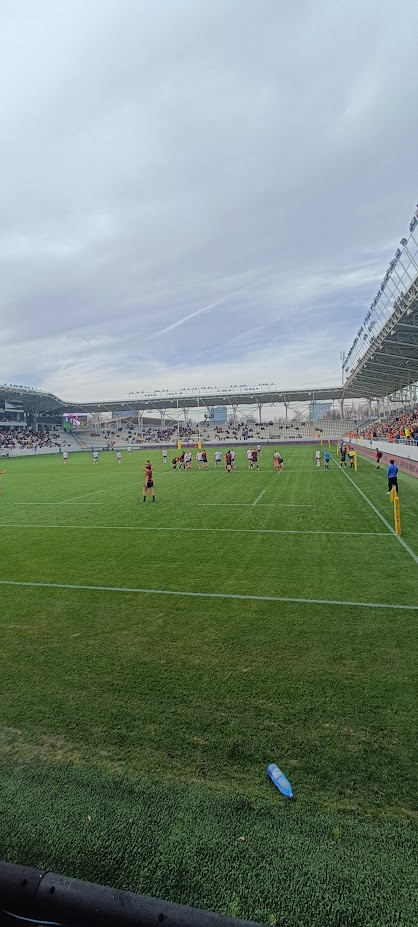

In [15]:
from IPython.display import Image, display
display(Image(filename='files/match.jpg'))

In [16]:
import base64
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

byte_image = encode_image('files/match.jpg')

In [17]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash', temperature=0.2)

prompt = 'What is in this image?'

message = HumanMessage(
    content=[
        {
            'type': 'text',
            'text': prompt
        },
        {
            'type': 'image_url',
            'image_url': {'url': f'data:image/jpeg;base64,{byte_image}'}
        }
    ]
)

response = llm.invoke([message])

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [18]:
print(response.content)

This image depicts a **rugby match or practice session taking place in a large, modern stadium** under an overcast sky.

Here's a breakdown of what's visible:

*   **Foreground:** A dark barrier or railing is at the very bottom, suggesting the photo was taken from a spectator area close to the field. A blue plastic bottle is lying on the green grass in the lower right.
*   **Field:** A well-maintained green grass field with white markings, typical of a rugby pitch. Several players, dressed in two different team uniforms (one predominantly white/light-colored, the other dark/maroon), are scattered across the field. Some players appear to be in a scrum or huddle formation, while others are standing or moving. H-shaped goalposts are visible on the right side of the field.
*   **Stadium:**
    *   Large, multi-tiered stands with seating surround the field, partially filled with spectators.
    *   The stadium features modern architecture with extensive metal framework and lighting structur

In [19]:
def ask_gemini(prompt, image_path, model='gemini-2.5-flash'):
    byte_image = encode_image(image_path)
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
    content=[
        {
            'type': 'text',
            'text': prompt
        },
        {
            'type': 'image_url',
            'image_url': {'url': f'data:image/jpeg;base64,{byte_image}'}
        }
    ]
    )
    response = llm.invoke([message])
    return response
    

In [20]:
response = ask_gemini('What is this sport?', 'files/match.jpg')
print(response.content)

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Based on the image, the sport being played is **Rugby**.

Key indicators:
1.  **H-shaped goalposts:** Visible on the right side of the field, these are characteristic of rugby (both Union and League).
2.  **Player formations:** The players in the middle-right are grouped tightly, resembling a scrum or ruck, which are fundamental aspects of rugby play.
3.  **Field markings:** The lines on the grass are consistent with a rugby pitch.
4.  **Player attire:** Players are wearing jerseys and shorts, without extensive padding, typical for rugby.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [21]:
response = ask_gemini('How many players can you identify in each team?', 'files/match.jpg')
print(response.content)


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Based on the image:

*   **White Team:** I can identify approximately **15** players.
*   **Maroon/Dark Red Team:** I can identify approximately **13** players.

It's a bit challenging to be exact due to the distance and some players being partially obscured in the clusters.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


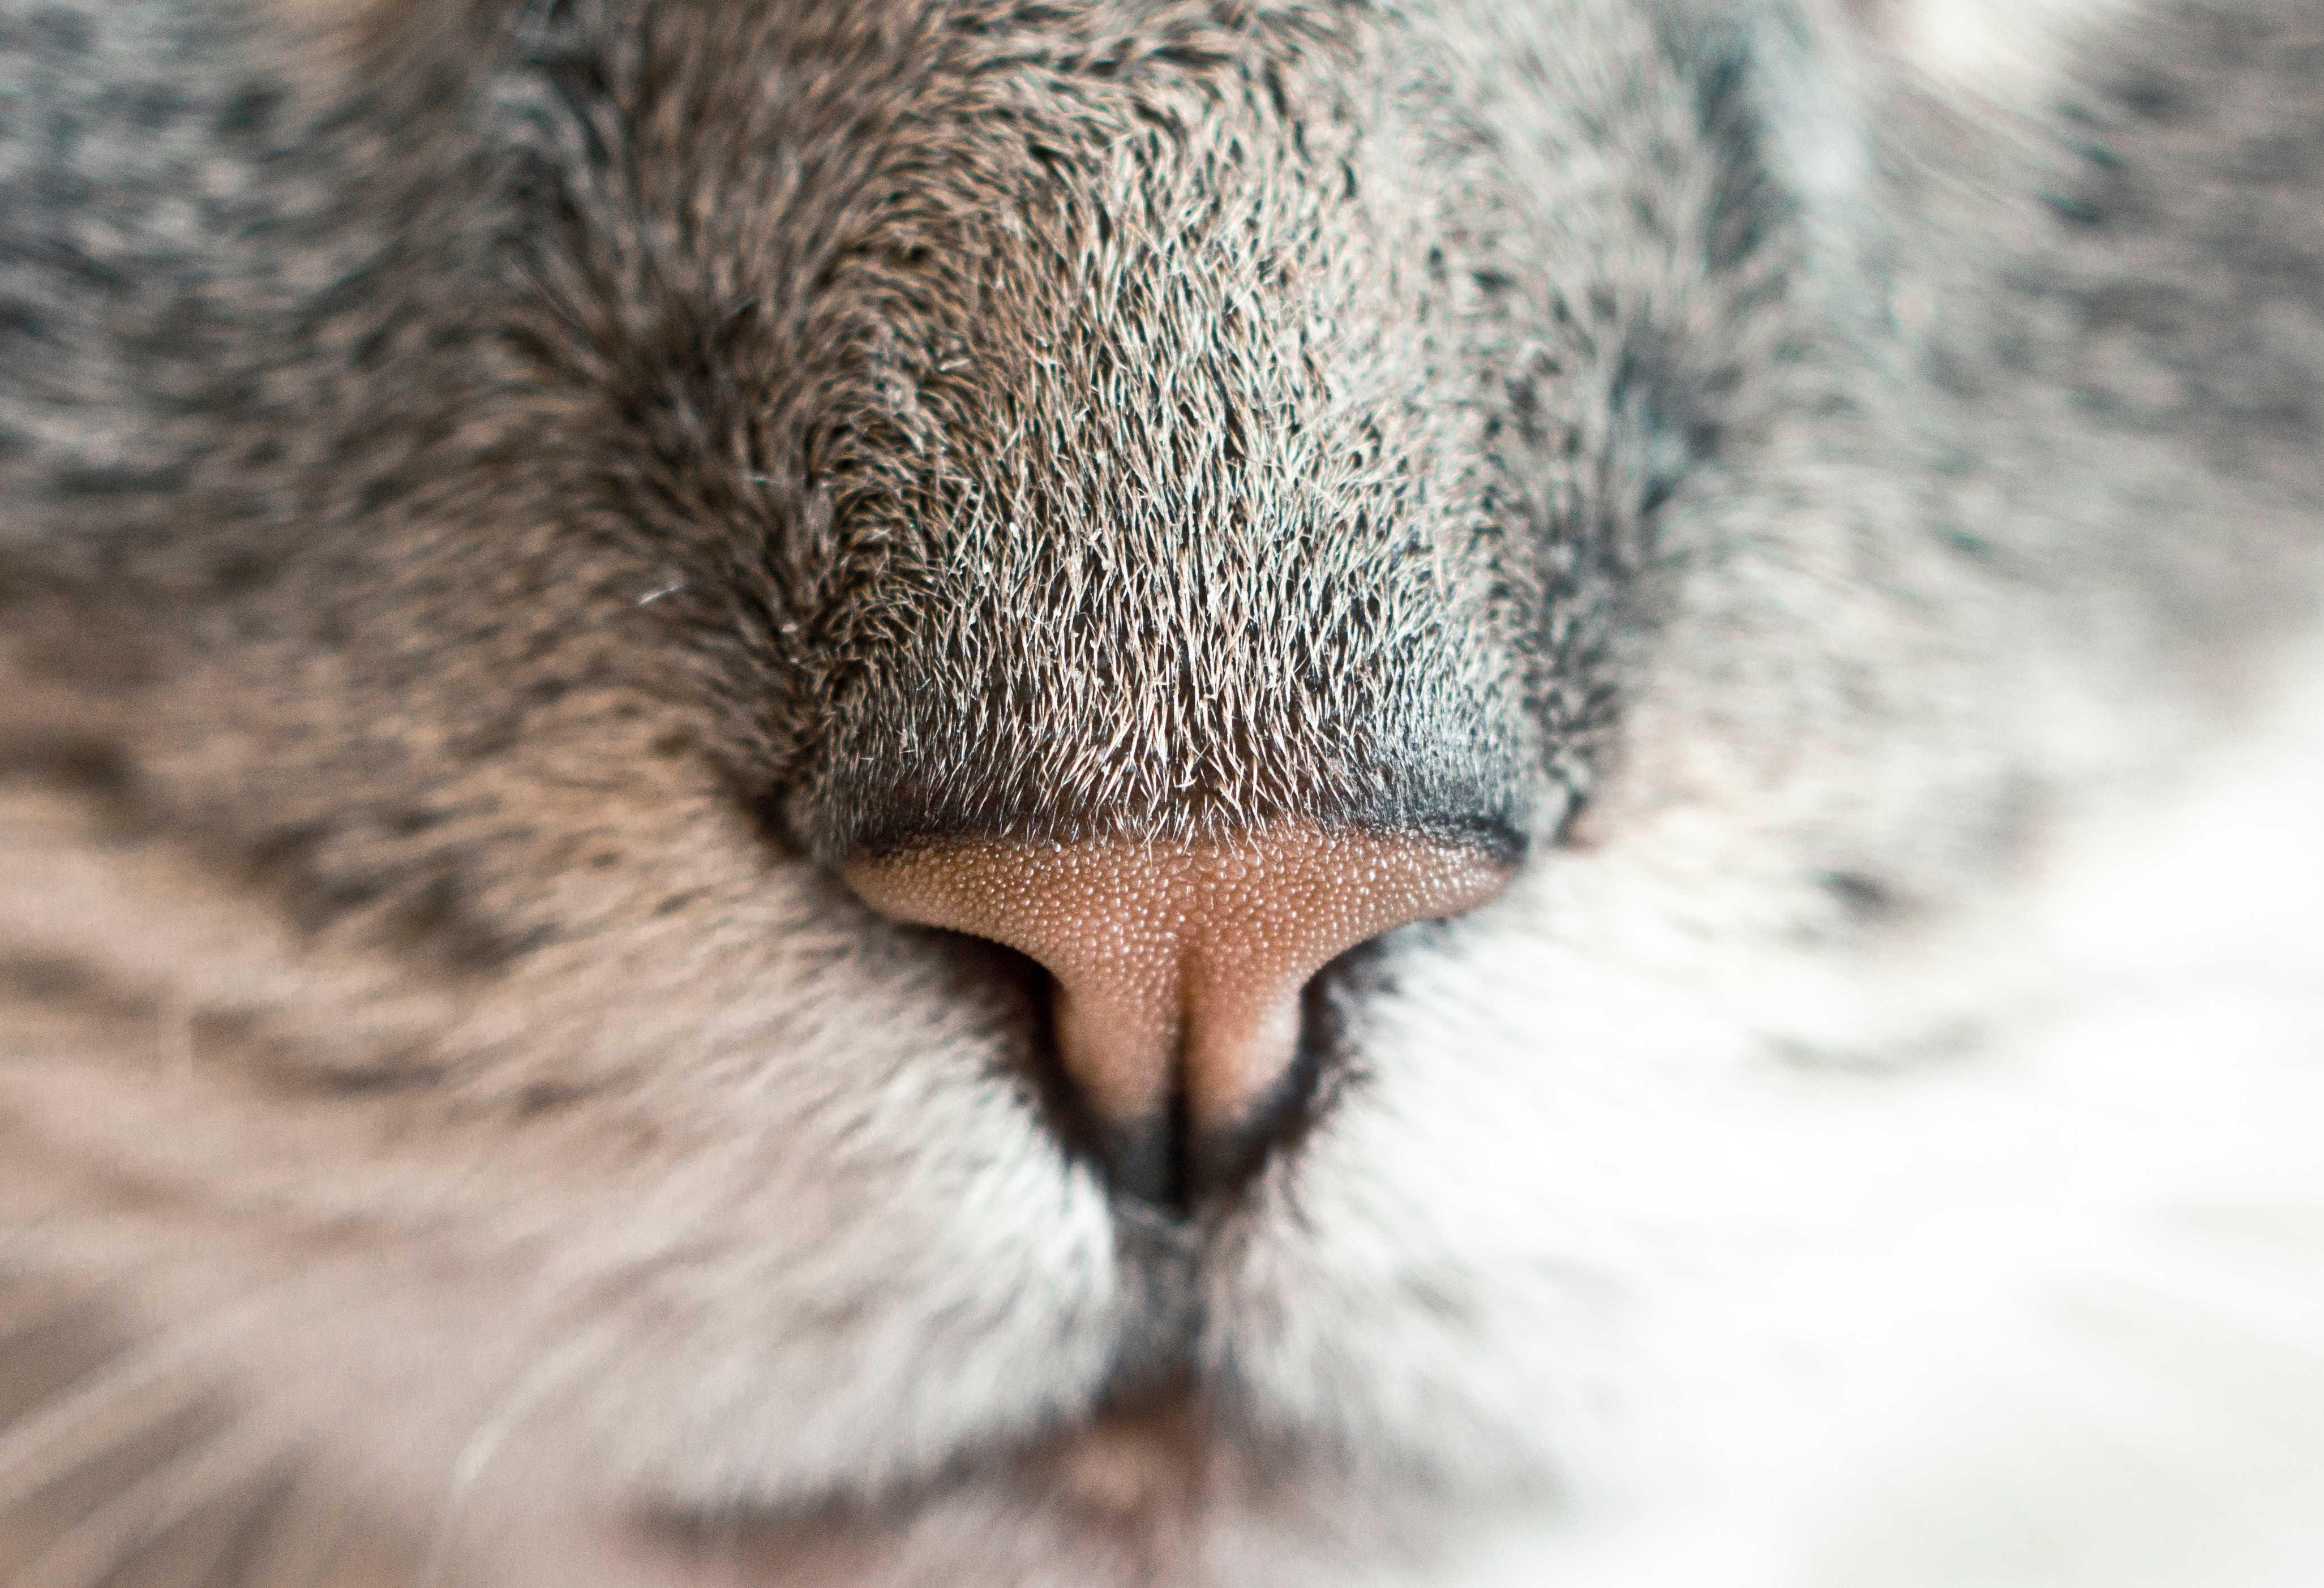

In [23]:
import requests # pip install requests
image_url = 'https://picsum.photos/id/40/4106/2806'
content = requests.get(image_url).content

with open('files/online_image.jpg', 'wb') as file:
    file.write(content)

display(Image(filename='files/online_image.jpg'))

In [24]:
response = ask_gemini('Describe this image as detailed as possible.', 'files/online_image.jpg')
print(response.content)

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


This image is an extremely close-up, macro shot of a cat's nose and the surrounding fur, captured with a very shallow depth of field that makes the central elements sharp while the periphery blurs into soft washes of color.

**Central Focus: The Nose**
The most prominent feature is the cat's nose, which is perfectly in focus and occupies the lower-middle section of the frame.
*   **Shape and Structure:** The nose is an inverted 'T' shape, or perhaps more accurately, a 'Y' shape with two distinct nostrils. The upper part is wider and rounded, tapering downwards into the philtrum (the vertical groove) that leads to the upper lip, though the lip itself is out of focus.
*   **Color:** The nose leather is a warm, rosy pinkish-brown, with subtle variations in tone. It appears healthy and possibly slightly moist.
*   **Texture:** The surface is incredibly detailed, covered in countless tiny, raised bumps or papillae, giving it a rough, granular texture. These bumps are particularly evident on

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
